In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import nltk
from nltk.corpus import stopwords
from collections import Counter
import networkx as nx

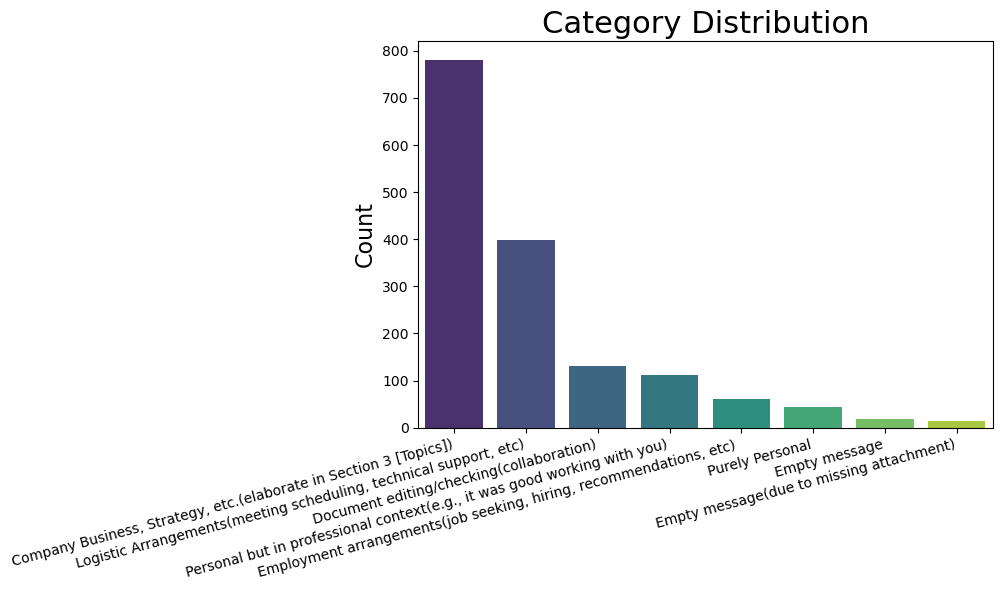

In [55]:
df = pd.read_csv('../2_modelling_BERT-base-uc-110m/2a_data_preparation_and_eda/simplified_labeled_enron.csv')

# Count the frequency of each category under 'label'
label_counts = df['category'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Category Distribution', size = 22)
plt.ylabel('Count', size = 16)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=15, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


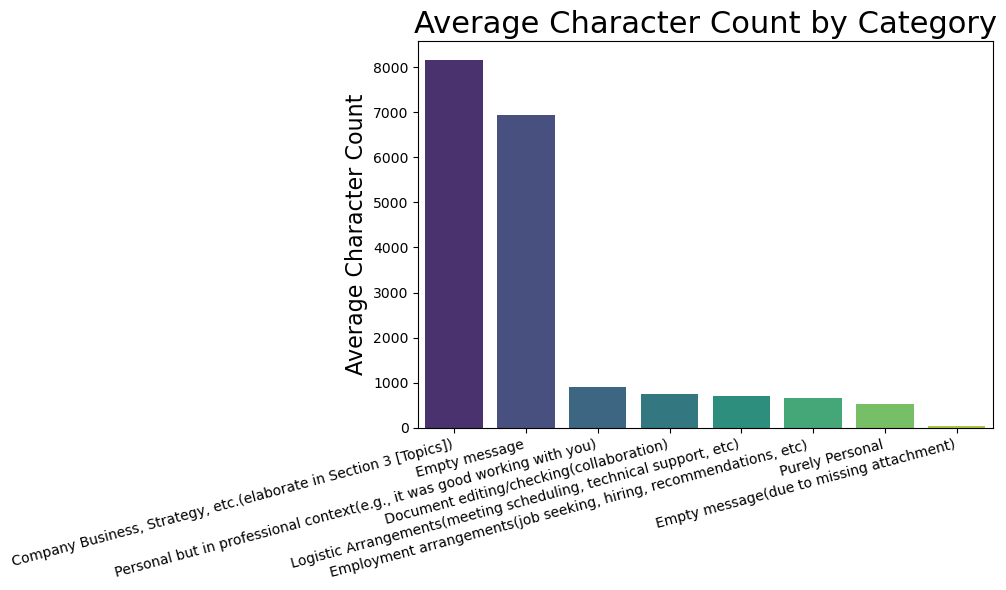

In [56]:
# Sort the DataFrame in descending order by 'body' column
average_character_count_by_category_sorted = average_character_count_by_category.sort_values(by='body', ascending=False)

# Create a bar plot using Seaborn with the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=average_character_count_by_category_sorted, x='category', y='body', palette='viridis')
plt.title('Average Character Count by Category', size=22)
plt.ylabel('Average Character Count', size=16)
plt.xlabel('')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=15, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sonic171717/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonic171717/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
power: 8687
said: 7951
state: 6783
california: 6154
energy: 5632
electricity: 3919
would: 3664
enron: 3325
davis: 2874
prices: 2309


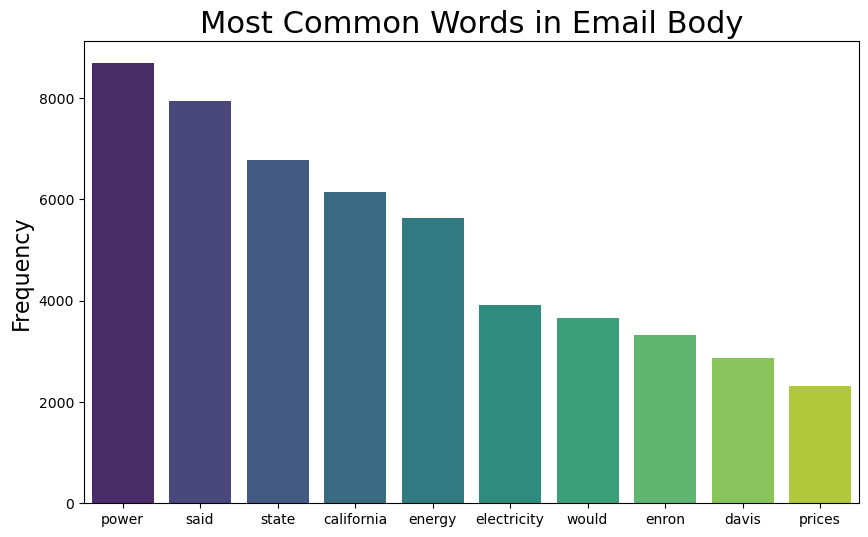

In [57]:

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Sample text data
text_data = df['body'].dropna()

# Text preprocessing (tokenization, lowercase, stopwords removal)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply preprocessing to the text data
processed_text = text_data.apply(preprocess_text)

# Calculate word frequency
word_frequency = Counter(token for tokens in processed_text for token in tokens)

# Display the most common words
most_common_words = word_frequency.most_common(10)
print("Most Common Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Create a bar chart of word frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='viridis')
plt.title('Most Common Words in Email Body', size = 22)
plt.xlabel('Word', size = 16)
plt.ylabel('Frequency', size = 16)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()


In [58]:
# Initialize a counter
davis_count = 0

# Iterate through email addresses
for email_address in email_graph.nodes():
    # Split the email address to extract the username
    username = email_address.split('@')[0]
    
    # Check if 'davis' is in the username (case insensitive)
    if 'davis' in username.lower():
        davis_count += 1

# Print the count
print(f"Number of email addresses containing 'davis' in the username: {davis_count}")


Number of email addresses containing 'davis' in the username: 3


In [59]:

# Load your email data into a DataFrame (replace 'email_data.csv' with your file)
df_all = pd.read_csv('../2_modelling_BERT-base-uc-110m/2a_data_preparation_and_eda/simplified_labeled_enron.csv')
df_network = df_all[['from', 'to']]
df_network.rename(columns={'from': 'sender', 'to': 'recipient'}, inplace=True)

# Define a function to extract the email address from the frozenset format
def extract_email(frozenset_str):
    if isinstance(frozenset_str, str):
        return frozenset_str.replace("frozenset({'", "").replace("'})", "")
    else:
        return frozenset_str

# Apply the extraction function to the "sender" and "recipient" columns
df_network['sender'] = df_network['sender'].apply(extract_email)
df_network['recipient'] = df_network['recipient'].apply(extract_email)

# Now, the "sender" columns will contain only the email addresses, but the "recipient" column is still messed up
# for example: matt.smith@enron.com', 'matthew.lenhart@enronon.com

# Define a function to clean and split recipient addresses
def clean_and_split_recipients(recipient_str):
    if isinstance(recipient_str, str):
        # Remove leading and trailing spaces, single quotes, and split by comma
        cleaned_recipients = recipient_str.strip(" '").split("', '")
        return cleaned_recipients
    else:
        return recipient_str

# Apply the cleaning and splitting function to the "recipient" column
df_network['recipient'] = df_network['recipient'].apply(clean_and_split_recipients)

# Now, the "recipient" column will contain lists of cleaned recipient addresses
df_network['recipient']


/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_16316/564397602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network.rename(columns={'from': 'sender', 'to': 'recipient'}, inplace=True)
/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_16316/564397602.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network['sender'] = df_network['sender'].apply(extract_email)
/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_16316/564397602.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

0                                  [todd.burke@enron.com]
1                                  [kim.bolton@enron.com]
2       [matt.smith@enron.com, matthew.lenhart@enron.c...
3       [matt.smith@enron.com, matthew.lenhart@enron.c...
4              [matt.smith@enron.com, m..tholt@enron.com]
                              ...                        
1697    [greg.whalley@enron.com, john.lavorato@enron.c...
1698    [greg.whalley@enron.com, kenneth.lay@enron.com...
1699                               [mark.whitt@enron.com]
1700     [williams@mailman.enron.com, bwillia5@enron.com]
1701                          [scottkuehn@go2netmail.com]
Name: recipient, Length: 1702, dtype: object

In [60]:
# Define a function to clean and split recipient addresses
def clean_and_split_recipients(recipient_str):
    if isinstance(recipient_str, str):
        # Remove leading and trailing spaces, single quotes, and split by comma
        cleaned_recipients = recipient_str.strip(" '").split("', '")
        return cleaned_recipients
    elif isinstance(recipient_str, float) and np.isnan(recipient_str):
        return []  # Handle NaN values by returning an empty list
    else:
        return [str(recipient_str)]  # Convert non-string values to string and return as a single-element list

df_network['recipient']


0                                  [todd.burke@enron.com]
1                                  [kim.bolton@enron.com]
2       [matt.smith@enron.com, matthew.lenhart@enron.c...
3       [matt.smith@enron.com, matthew.lenhart@enron.c...
4              [matt.smith@enron.com, m..tholt@enron.com]
                              ...                        
1697    [greg.whalley@enron.com, john.lavorato@enron.c...
1698    [greg.whalley@enron.com, kenneth.lay@enron.com...
1699                               [mark.whitt@enron.com]
1700     [williams@mailman.enron.com, bwillia5@enron.com]
1701                          [scottkuehn@go2netmail.com]
Name: recipient, Length: 1702, dtype: object

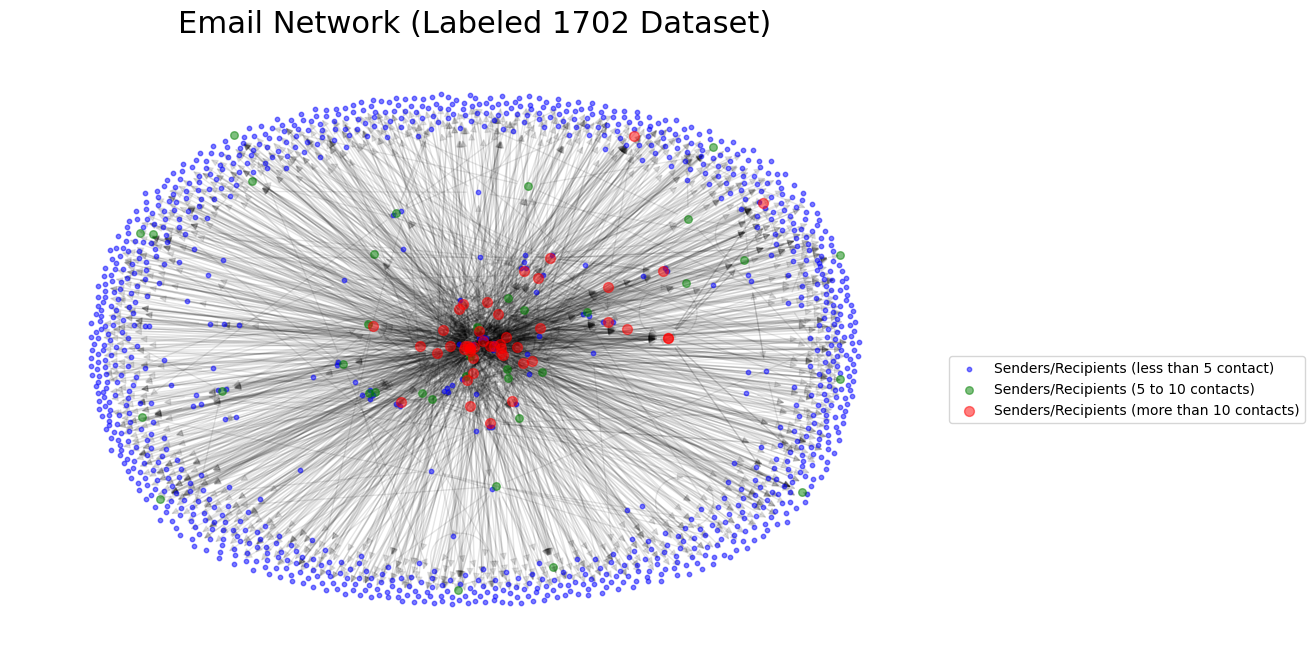

In [61]:
# Define a function to create a graph from the DataFrame
def create_email_network(df):
    G = nx.DiGraph()
    
    # Add edges (senders to recipients)
    for _, row in df.iterrows():
        sender = row['sender']
        recipients = row['recipient']
        
        # Check if recipients is a list and not NaN
        if isinstance(recipients, list):
            # Add sender node
            G.add_node(sender, node_type='sender')
            
            # Add recipient nodes and edges
            for recipient in recipients:
                G.add_node(recipient, node_type='recipient')
                G.add_edge(sender, recipient)
    
    return G

# Create the email network graph using the entire dataset
email_graph = create_email_network(df_network)

# Compute node degrees
node_degrees = dict(email_graph.degree())

# Define node size categories based on degrees
small_size = 10
medium_size = 30
large_size = 50

# Categorize nodes into three different sizes
node_sizes = [small_size if node_degrees[node] <= 5 else (medium_size if node_degrees[node] <= 10 else large_size) for node in email_graph.nodes()]

# Plot the network
plt.figure(figsize=(12, 8))

# Create node lists for senders and recipients
senders = [node for node, data in email_graph.nodes(data=True) if data['node_type'] == 'sender']
recipients = [node for node, data in email_graph.nodes(data=True) if data['node_type'] == 'recipient']

# Draw nodes with categorized sizes
pos = nx.spring_layout(email_graph)  # You can choose a different layout if you prefer

# Draw small-sized nodes
small_nodes = [node for node, size in zip(email_graph.nodes(), node_sizes) if size == small_size]
nx.draw_networkx_nodes(email_graph, pos, nodelist=small_nodes, node_color='b', alpha=0.5, node_size=small_size, label='Senders/Recipients (less than 5 contact)')

# Draw medium-sized nodes
medium_nodes = [node for node, size in zip(email_graph.nodes(), node_sizes) if size == medium_size]
nx.draw_networkx_nodes(email_graph, pos, nodelist=medium_nodes, node_color='g', alpha=0.5, node_size=medium_size, label='Senders/Recipients (5 to 10 contacts)')

# Draw large-sized nodes
large_nodes = [node for node, size in zip(email_graph.nodes(), node_sizes) if size == large_size]
nx.draw_networkx_nodes(email_graph, pos, nodelist=large_nodes, node_color='r', alpha=0.5, node_size=large_size, label='Senders/Recipients (more than 10 contacts)')

# Draw edges
nx.draw_networkx_edges(email_graph, pos, alpha=0.1, arrowsize=10)

# Add legend
plt.legend(bbox_to_anchor=(1.4, 0.5))

# Show the plot
plt.title('Email Network (Labeled 1702 Dataset)', size = 22)
plt.axis('off')
plt.show()


In [62]:
# Sort the list in descending order based on contact counts
large_nodes_with_contacts_sorted = sorted(large_nodes_with_contacts, key=lambda x: x[1], reverse=True)

# Print the sorted list
print("Nodes with more than 10 contacts and their contact counts (sorted in descending order):")
for node, contact_count in large_nodes_with_contacts_sorted:
    print(f"Node: {node}, Contacts: {contact_count}")

# Calculate the length of the sorted list
node_count_more_than_10_contacts_sorted = len(large_nodes_with_contacts_sorted)

# Print the result
print(f"The sorted list contains {node_count_more_than_10_contacts_sorted} nodes with more than 10 contacts.")



Nodes with more than 10 contacts and their contact counts (sorted in descending order):
Node: steven.kean@enron.com, Contacts: 301
Node: jeff.dasovich@enron.com, Contacts: 147
Node: susan.mara@enron.com, Contacts: 118
Node: dan.wall@lw.com, Contacts: 103
Node: jmunoz@mcnallytemple.com, Contacts: 82
Node: miyung.buster@enron.com, Contacts: 82
Node: john.shelk@enron.com, Contacts: 78
Node: alan.comnes@enron.com, Contacts: 77
Node: j.kaminski@enron.com, Contacts: 71
Node: mary.hain@enron.com, Contacts: 68
Node: angela.wilson@enron.com, Contacts: 62
Node: karen.denne@enron.com, Contacts: 57
Node: rcarroll@bracepatt.com, Contacts: 35
Node: steven@iepa.com, Contacts: 34
Node: linda.wehring@enron.com, Contacts: 33
Node: ray.alvarez@enron.com, Contacts: 32
Node: james.steffes@enron.com, Contacts: 29
Node: thane.twiggs@enron.com, Contacts: 28
Node: paul.simons@enron.com, Contacts: 27
Node: robert.frank@enron.com, Contacts: 25
Node: droark@velaw.com, Contacts: 25
Node: mmcgown@velaw.com, Contact

In [63]:
# Filter the list to include only nodes not ending with "enron.com"
filtered_large_nodes = [node for node in large_nodes_list if not node.endswith("enron.com")]

# Print the filtered list
print("Nodes with more than 10 contacts and not ending with 'enron.com':")
print(filtered_large_nodes)

# Filter the list to include only nodes not ending with "enron.com"
filtered_large_nodes_enron = [node for node in large_nodes_list if node.endswith("enron.com")]

# Print the filtered list
print("Nodes with more than 10 contacts and ending with 'enron.com':")
print(filtered_large_nodes_enron)

Nodes with more than 10 contacts and not ending with 'enron.com':
['richardson@copn.com', 'jmunoz@mcnallytemple.com', 'douglass@arterhadden.com', 'steven@iepa.com', 'gfergus@brobeck.com', 'rcarroll@bracepatt.com', 'terri_l_ponce_de_leon@calpx.com', 'dwatkiss@bracepatt.com', 'droark@velaw.com', 'mmcgown@velaw.com', 'dan.wall@lw.com']
Nodes with more than 10 contacts and ending with 'enron.com':
['phillip.allen@enron.com', 'beth.apollo@enron.com', 'david.oxley@enron.com', 'stanley.horton@enron.com', 'michelle.cash@enron.com', 'jeff.bartlett@enron.com', 'steven.kean@enron.com', 'jeff.dasovich@enron.com', 'karen.denne@enron.com', 'mark.palmer@enron.com', 'susan.mara@enron.com', 'paul.kaufman@enron.com', 'james.steffes@enron.com', 'peggy.mahoney@enron.com', 'richard.shapiro@enron.com', 'mona.petrochko@enron.com', 'joe.hartsoe@enron.com', 'sarah.novosel@enron.com', 'robert.frank@enron.com', 'alan.comnes@enron.com', 'richard.sanders@enron.com', 'miyung.buster@enron.com', 'linda.robertson@enro

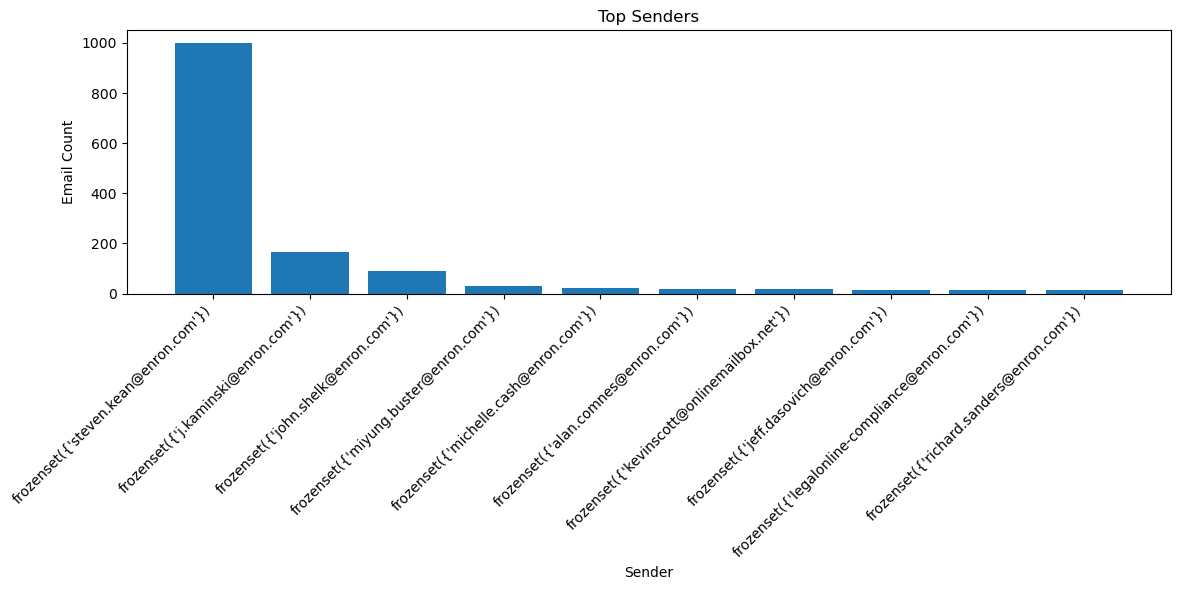

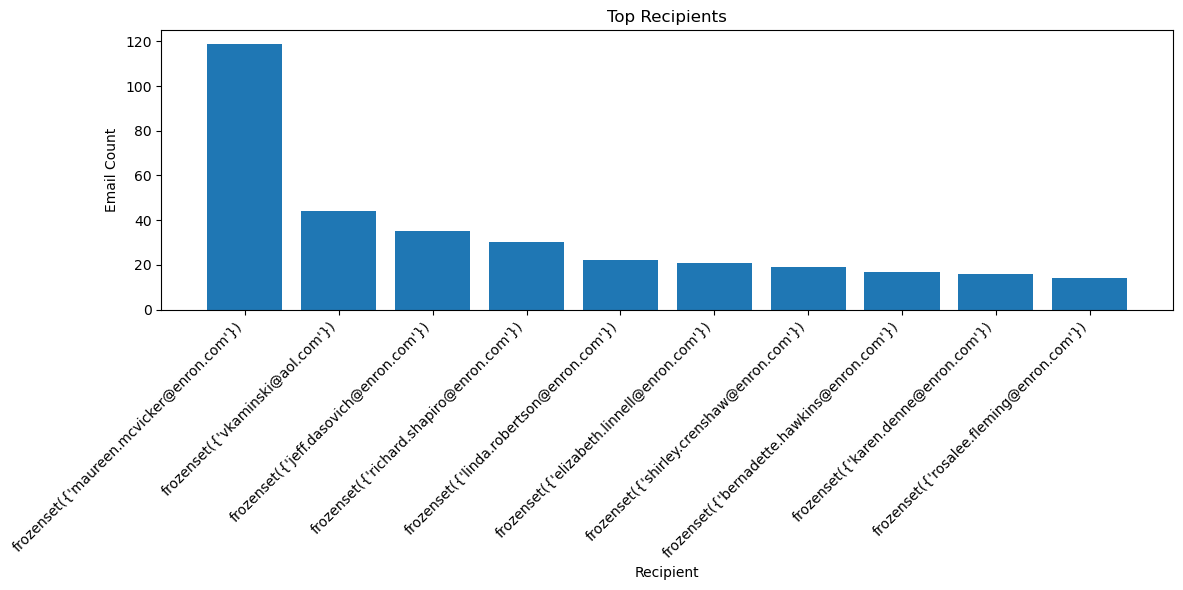

In [69]:
df_all = pd.read_csv('../1_data_preparation_and_eda/labelled_enron.csv')

# Sender Analysis
sender_counts = df_all['from'].value_counts().reset_index()
sender_counts.columns = ['Sender', 'Email Count']

# Top Senders (e.g., top 10)
top_senders = sender_counts.head(10)

# Recipient Analysis
recipient_counts = df_all['to'].explode().value_counts().reset_index()
recipient_counts.columns = ['Recipient', 'Email Count']

# Top Recipients (e.g., top 10)
top_recipients = recipient_counts.head(10)

# Visualize Top Senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['Sender'], top_senders['Email Count'])
plt.title('Top Senders')
plt.xlabel('Sender')
plt.ylabel('Email Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Top Recipients
plt.figure(figsize=(12, 6))
plt.bar(top_recipients['Recipient'], top_recipients['Email Count'])
plt.title('Top Recipients')
plt.xlabel('Recipient')
plt.ylabel('Email Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
